## Lista de bibliotecas importadas para realização do projeto

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import f1_score



# Importação dos dados para análise

In [31]:
# abrindo o arquivo contendo do DataSet e transformando-os em DataFrame para melhor vizualisação e análise:

df = pd.read_csv('../credito-imoveis/application_train.csv')

print('planilha de treino: ', df.shape)

planilha de treino:  (246008, 122)


In [32]:
pd.options.display.max_columns = 150

# Realização da Exploração e Análise dos Dados - EDA (Expoloration Data Analysis)

### Passo 1 - Entendendo os dados e preparando os dados:

#### A. Conhecendo o df:

In [33]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,NaN,1,1,1,1,0,0,Core staff,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0,0.0,0.0630,0.0313,0.9762,0.6864,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0,0.0,0.0625,0.0302,0.9762,0.6780,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0,0.0,reg oper account,block of flats,0.0399,Block,No,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,NaN,1,1,0,1,0,0,High skill tech staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.0,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0,0.0,0.0231,0.0587,0.9806,0.7452,0.0162,0.0,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0,0.0,0.0229,0.0566,0.9806,0.7383,0.0162,0.0,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0,0.0,reg oper account,block of flats,0.0158,Block,No,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,9.0,1,1,1,1,0,0,Managers,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Constata-se que o dataset é grande com muitos dados e colunas de difícil entendimento.

#### B. Verificando os tipos de dados contidos no df por coluna:

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Conclue-se que a maior parte do dataset é constitído de dados numéricos, são poucas colunas com dados classificatórios.

#### C. Verificando se há linhas duplicadas:

In [35]:
df.duplicated().value_counts()

False    246008
dtype: int64

Constata-se, portanto, que não há linhas duplicadas.

#### D. Verificando se há ou não dados nulos:

In [36]:
df.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        10
AMT_GOODS_PRICE                   226
NAME_TYPE_SUITE                  1048
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    162359
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

Foram encontrados dados nulos em algumas colunas que deverão ser tratados.

#### E. Tratando os dados nulos:

Quantificando os dados nulos:

In [37]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    246008 non-null  int64  
 1    TARGET                        246008 non-null  int64  
 2    NAME_CONTRACT_TYPE            246008 non-null  object 
 3    CODE_GENDER                   246008 non-null  object 
 4    FLAG_OWN_CAR                  246008 non-null  object 
 5    FLAG_OWN_REALTY               246008 non-null  object 
 6    CNT_CHILDREN                  246008 non-null  int64  
 7    AMT_INCOME_TOTAL              246008 non-null  float64
 8    AMT_CREDIT                    246008 non-null  float64
 9    AMT_ANNUITY                   245998 non-null  float64
 10   AMT_GOODS_PRICE               245782 non-null  float64
 11   NAME_TYPE_SUITE               244960 non-null  object 
 12   NAME_INCOME_TYPE            

In [38]:
df.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        10
AMT_GOODS_PRICE                   226
NAME_TYPE_SUITE                  1048
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    162359
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

Visualizando a porcentagem de dados faltantes por coluna:

In [39]:
nulos_por_coluna = df.isnull().mean()*100
nulos_por_coluna.head(60)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004065
AMT_GOODS_PRICE                 0.091867
NAME_TYPE_SUITE                 0.426002
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.997447
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

Constata-se do resultado acima que há colunas com uma porcentagem alta de valores nulos. Tais colunas não terão grande influencia na construção do aprendizado de máquina e por isso serão excluídas aquelas com o percentual acima de 20%.

Será utilizado o método dropna com os parâmetros thresh (parâmetro que apaga as colunas que não tenham o pelo menos a quantidade de valores não nulos passados, ou seja, se a coluna tiver valores não nulos menor daquele passado no parâmetro, será deletada) e o parâmetro axis (aponta qual serie será deletado linha (0) ou coluna (1).

No presente caso, o thresh receberá o valor de 80% do tamanho do dataframe, ou seja, a coluna ou linha deverá conter pelo menos 80% das linhas preenchidas com valores não nulos, caso a porcentagem seja menor, a coluna ou linha será excluída. Já o axis receberá  o valor 1, indicando que a coluna será descartada.

In [40]:
df = df.dropna(thresh=len(df)*0.90, axis=1)

Após a exclusão das colunas com os parâmetros acima, restaram 72 colunas no dataframe, conforme verifica-se abaixo:

In [41]:
df.shape[1]

65

In [42]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   246008 non-null  int64  
 1   TARGET                       246008 non-null  int64  
 2   NAME_CONTRACT_TYPE           246008 non-null  object 
 3   CODE_GENDER                  246008 non-null  object 
 4   FLAG_OWN_CAR                 246008 non-null  object 
 5   FLAG_OWN_REALTY              246008 non-null  object 
 6   CNT_CHILDREN                 246008 non-null  int64  
 7   AMT_INCOME_TOTAL             246008 non-null  float64
 8   AMT_CREDIT                   246008 non-null  float64
 9   AMT_ANNUITY                  245998 non-null  float64
 10  AMT_GOODS_PRICE              245782 non-null  float64
 11  NAME_TYPE_SUITE              244960 non-null  object 
 12  NAME_INCOME_TYPE             246008 non-null  object 
 13 

Entretanto, ainda há dados nulos no dataframe a serem tratados, todavia, em quantitavo muito inferior a 7.326.502, facilitando o tratamento, conforme abaixo:

In [43]:
df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64

In [44]:
df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64

In [45]:
nulos_por_coluna = df.isnull().mean()*100
nulos_por_coluna.tail(60)

FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.004065
AMT_GOODS_PRICE                0.091867
NAME_TYPE_SUITE                0.426002
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000406
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000


In [46]:
nulos_por_coluna.sort_values(ascending=False).head(60)

NAME_TYPE_SUITE                0.426002
OBS_30_CNT_SOCIAL_CIRCLE       0.330477
DEF_30_CNT_SOCIAL_CIRCLE       0.330477
OBS_60_CNT_SOCIAL_CIRCLE       0.330477
DEF_60_CNT_SOCIAL_CIRCLE       0.330477
EXT_SOURCE_2                   0.221131
AMT_GOODS_PRICE                0.091867
AMT_ANNUITY                    0.004065
DAYS_LAST_PHONE_CHANGE         0.000406
CNT_FAM_MEMBERS                0.000406
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_6                0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000


In [47]:
nulos_por_coluna.info()

<class 'pandas.core.series.Series'>
Index: 65 entries, SK_ID_CURR to FLAG_DOCUMENT_21
Series name: None
Non-Null Count  Dtype  
--------------  -----  
65 non-null     float64
dtypes: float64(1)
memory usage: 1.0+ KB


Continuando o tratamento dos dados nulos, podemos, ainda, excluir as linhas que contem 1 ou mais dados nulos, visto que a perda de dados em relação ao seu total (em torno de 20%) não será significativa para comprometer o aprendizado do modelo, posto que o volume de dados é alto.

In [48]:
df = df.dropna(axis=0)

In [49]:
df.shape[0]

243597

Uma vez que, após a exclusão das linhas duplicadas, o dataframe permanecerá com o index das linhas originais, devemos reorganizá-lo, a fim, de facilitar a leitura das linhas, utilizando o método reset_index com o parêmatro drop=True, a fim de não transformar o index em coluna, apenas para tê-lo como referência no momento de leitura e análise do dataframe.

In [50]:
df = df.reset_index(drop=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,1,1,1,1,0,0,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,0.699373,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,1,1,0,1,0,0,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.199651,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,1,1,1,1,0,0,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,0.704880,1.0,1.0,1.0,1.0,-675.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,679500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.046220,-22425,365243,-11805.0,-1732,1,0,0,1,1,0,2.0,1,1,TUESDAY,9,0,0,0,0,0,0,XNA,0.724576,2.0,0.0,2.0,0.0,-1588.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-18839,-2763,-5069.0,-2381,1,1,0,1,1,0,1.0,2,2,FRIDAY,16,0,0,0,0,0,0,Transport: type 4,0.706310,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243592,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,918000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-15992,-4333,-10024.0,-4089,1,1,0,1,0,0,3.0,2,2,FRIDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.701172,6.0,0.0,6.0,0.0,-2791.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243593,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,585000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.003122,-23798,365243,-3734.0,-4637,1,0,0,1,0,0,2.0,3,3,SATURDAY,13,0,0,0,1,0,0,XNA,0.364945,0.0,0.0,0.0,0.0,-1431.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243594,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-14793,-1982,-7629.0,-4453,1,1,1,1,1,0,3.0,1,1,SATURDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.285898,3.0,0.0,3.0,0.0,-1535.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243595,236776,1,Cash loan

#### F. Analisando as colunas e suas correlações:

A finalidade neste tópico é perceber quais colunas são as mais importantes para o dataset.

In [51]:
correlacao = df.corr()

In [52]:
correlacao

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002705,-0.000443,-2.576327e-03,0.000511,0.000387,0.000546,0.000126,-0.002065,0.001837,-0.002743,0.000063,NaN,-0.001795,-0.000288,0.004535,0.003330,-0.000977,-0.001523,0.000832,0.000484,-0.001190,0.000649,0.001446,0.002685,-0.001328,0.000321,0.001339,0.001423,-0.002065,-0.002073,-0.002114,-0.000810,0.001011,0.001507,-0.003971,-0.004471,-0.001306,0.001566,-0.002311,0.002357,0.001427,1.073682e-03,-0.001904,-0.001177,-0.000894,-0.002353,0.002542,-0.000064,0.001448,-0.000178,0.001631,0.000382,0.000427
TARGET,-0.002705,1.000000,0.019270,-1.933323e-03,-0.031044,-0.013826,-0.039937,-0.036220,0.079813,-0.045052,0.041864,0.051523,NaN,0.046090,0.027286,-0.000444,-0.023746,-0.002025,0.009221,0.059261,0.061620,-0.023045,0.006833,0.006569,0.001840,0.045750,0.050449,0.031242,-0.161406,0.007796,0.029875,0.007724,0.029540,0.055199,0.005120,0.043626,-0.002765,-0.001400,-0.027862,-0.001065,-0.007932,-0.003634,-8.531777e-04,-0.004872,-0.000853,-0.011751,-0.009688,-0.006688,-0.010632,-0.002975,-0.008617,-0.002715,-0.000523,0.003807
CNT_CHILDREN,-0.000443,0.019270,1.000000,1.284213e-02,0.002089,0.022162,-0.002046,-0.022729,0.333085,-0.239913,0.183963,-0.026789,NaN,0.240840,0.055061,-0.001790,-0.030352,0.024006,0.878782,0.023579,0.022976,-0.006879,-0.013293,0.007732,0.014188,0.021526,0.071205,0.069489,-0.017794,0.013611,-0.001744,0.013172,-0.002711,-0.005703,0.002529,0.056813,-0.004746,-0.018136,-0.156985,-0.000262,0.052430,-0.002423,-1.654045e-03,-0.004547,0.000335,0.004550,-0.005643,0.005512,0.009178,0.000490,0.003098,0.001006,0.002597,-0.001379
AMT_INCOME_TOTAL,-0.002576,-0.001933,0.012842,1.000000e+00,0.141346,0.173511,0.143793,0.067168,0.025418,-0.058728,0.024942,0.007550,NaN,0.058525,-0.015171,-0.007050,0.000460,0.034853,0.015614,-0.077245,-0.082766,0.033083,0.028628,0.056380,0.052486,0.003293,0.005662,0.007323,0.054368,-0.012164,-0.012228,-0.012107,-0.011827,-0.017501,-0.001222,-0.014196,0.000003,0.001493,-0.041395,0.005895,0.065834,0.016404,-1.777495e-07,0.002406,0.002591,0.020165,0.019187,0.008808,0.006286,0.001670,0.002721,0.002321,0.000441,-0.000823
AMT_CREDIT,0.000511,-0.031044,0.002089,1.413462e-01,1.000000,0.768921,0.987034,0.101150,-0.056562,-0.064535,0.009114,-0.005679,NaN,0.063189,-0.019741,0.024238,0.028861,0.017633,0.063334,-0.100867,-0.110302,0.053027,0.023935,0.050353,0.051009,-0.027390,-0.019552,-0.000083,0.132098,0.000900,-0.020861,0.000846,-0.023131,-0.076093,0.009437,0.094035,-0.001613,-0.007412,-0.045654,-0.000720,0.082017,0.021221,-9.883199e-04,0.028037,0.004322,0.053381,0.049940,0.030490,0.063264,0.009596,0.034158,0.020686,0.031575,-0.015065
AMT_ANNUITY,0.000387,-0.013826,0.022162,1.735108e-01,0.768921,1.000000,0.774091,0.119452,0.009460,-0.103285,0.039096,0.012861,NaN,0.102497,-0.024917,0.022942,0.012795,0.071987,0.076473,-0.128255,-0.141619,0.052444,0.041971,0.078417,0.073079,-0.005970,-0.000186,0.008825,0.126945,-0.011041,-0.021615,-0.010875,-0.022766,-0.064539,0.003696,0.101250,-0.002434,-0.001706,-0.072804,0.001351,0.129037,0.032189,-8.114355e-04,-0

In [53]:
df = df.drop(["FLAG_MOBIL"], axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243597 entries, 0 to 243596
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   243597 non-null  int64  
 1   TARGET                       243597 non-null  int64  
 2   NAME_CONTRACT_TYPE           243597 non-null  object 
 3   CODE_GENDER                  243597 non-null  object 
 4   FLAG_OWN_CAR                 243597 non-null  object 
 5   FLAG_OWN_REALTY              243597 non-null  object 
 6   CNT_CHILDREN                 243597 non-null  int64  
 7   AMT_INCOME_TOTAL             243597 non-null  float64
 8   AMT_CREDIT                   243597 non-null  float64
 9   AMT_ANNUITY                  243597 non-null  float64
 10  AMT_GOODS_PRICE              243597 non-null  float64
 11  NAME_TYPE_SUITE              243597 non-null  object 
 12  NAME_INCOME_TYPE             243597 non-null  object 
 13 

In [55]:
df.to_csv("Aplication_train.csv")

In [56]:
df = pd.read_csv("Aplication_train.csv", index_col=0)

In [59]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,1,1,1,0,0,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,0.699373,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,1,0,1,0,0,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.199651,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,1,1,1,0,0,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,0.704880,1.0,1.0,1.0,1.0,-675.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,679500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.046220,-22425,365243,-11805.0,-1732,0,0,1,1,0,2.0,1,1,TUESDAY,9,0,0,0,0,0,0,XNA,0.724576,2.0,0.0,2.0,0.0,-1588.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-18839,-2763,-5069.0,-2381,1,0,1,1,0,1.0,2,2,FRIDAY,16,0,0,0,0,0,0,Transport: type 4,0.706310,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243592,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,918000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-15992,-4333,-10024.0,-4089,1,0,1,0,0,3.0,2,2,FRIDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.701172,6.0,0.0,6.0,0.0,-2791.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243593,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,585000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.003122,-23798,365243,-3734.0,-4637,0,0,1,0,0,2.0,3,3,SATURDAY,13,0,0,0,1,0,0,XNA,0.364945,0.0,0.0,0.0,0.0,-1431.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243594,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-14793,-1982,-7629.0,-4453,1,1,1,1,0,3.0,1,1,SATURDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.285898,3.0,0.0,3.0,0.0,-1535.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243595,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,176

In [60]:
X = df.drop(columns="TARGET")
y = df["TARGET"]

In [61]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
def pipe_pre_process_german(drop_not_features=["Risk"], col_target="Risk",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''
    
    df = pd.read_csv("Aplication_train.csv", index_col=0)

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [67]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_german(drop_not_features=["TARGET"], 
                                                                            col_target="TARGET",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [68]:
pre_processador

ColumnTransformer(transformers=[('transf_num',
                                 Pipeline(steps=[('input_num', SimpleImputer()),
                                                 ('std', StandardScaler())]),
                                 ['SK_ID_CURR', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
                                  'FLAG_WORK_PHONE', 'FLAG_C...
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [72]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

    # ============================================

    f1_score_weighted = f1_score(y_test, y_pred_test, average='weighted')
    print(f"F1-score weighted: {100*f1_score_weighted:.2f}")
    return f1_score_weighted


Métricas de avaliação de treino:


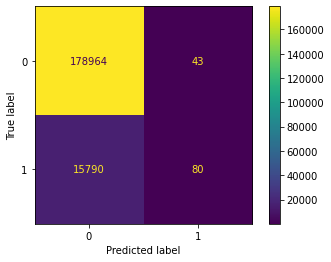

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    179007
           1       0.65      0.01      0.01     15870

    accuracy                           0.92    194877
   macro avg       0.78      0.50      0.48    194877
weighted avg       0.90      0.92      0.88    194877


Métricas de avaliação de teste:


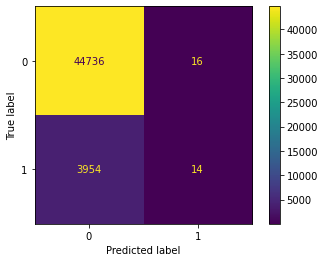

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     44752
           1       0.47      0.00      0.01      3968

    accuracy                           0.92     48720
   macro avg       0.69      0.50      0.48     48720
weighted avg       0.88      0.92      0.88     48720

F1-score weighted: 88.01


In [75]:
pipe = Pipeline([("pp", pre_processador),
                 ("gb", GradientBoostingClassifier(random_state=42))])

pipe.fit(X_train, y_train)

score = metricas_classificacao(pipe, X_train, X_test, y_train, y_test)

Nas colunas de tipo numérico, os valores nulos serão substituídos pela média dos valores contidos na coluna.
Para as colunas do tipo categórico os valores serão subistituídos pela moda dos valores contidos na coluna. 

In [ ]:
# Analisar se plausível a substituição dos nulos.

In [24]:
for column, row in df.iteritems():
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])    

In [ ]:
Não resta, então, nenhum valor nulo.

In [26]:
df.isnull().sum().sum()

0

In [110]:
type(3)

int

In [99]:
#df=df.dropna(axis=0, how='any')
#df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38,113812,0,Cash loans,M,Y,Y,0,225000.0,497520.0,53712.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
50,129009,0,Cash loans,F,Y,Y,0,135000.0,518562.0,26604.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
112,441227,0,Cash loans,F,Y,N,0,360000.0,367560.0,13855.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
134,112534,0,Cash loans,M,Y,N,0,180000.0,269550.0,21739.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
145,195991,0,Cash loans,M,Y,Y,0,157500.0,576072.0,28147.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245676,370277,0,Cash loans,M,Y,N,0,157500.0,521451.0,23098.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
245742,303156,0,Cash loans,M,Y,Y,0,675000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
245801,167047,1,Cash loans,M,Y,Y,0,112500.0,360000.0,19530.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,4.0
245828,148268,0,Cash loans,M,Y,N,0,180000.0,135000.0,14305.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df = df.fillna(df.mean())


In [ ]:
df.isnull().sum()